# Hotel - Review 데이터

In [312]:
import pandas as pd
import nltk
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import RegexpTokenizer
import re

In [298]:
df = pd.read_csv('hotel-reviews.csv')

In [299]:
df.head()

,User_ID,Description,Browser_Used,Device_Used,Is_Response
0,id10326,The room was kind of clean but had a VERY stro...,Edge,Mobile,not happy
1,id10327,I stayed at the Crown Plaza April -- - April -...,Internet Explorer,Mobile,not happy
2,id10328,I booked this hotel through Hotwire at the low...,Mozilla,Tablet,not happy
3,id10329,Stayed here with husband and sons on the way t...,InternetExplorer,Desktop,happy
4,id10330,My girlfriends and I stayed here to celebrate ...,Edge,Tablet,not happy


In [336]:
def tokenizer(x):
    text = re.sub(r'[-=+,#/\?:^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…》]', '', x)
    return re.findall(r'[a-z]+',RegexpTokenizer(r'\w+').tokenize(text.lower()))

df['Token'] = df['Description'].apply(nltk_tokenizer)
df.head()

,User_ID,Description,Browser_Used,Device_Used,Is_Response,Token
0,id10326,The room was kind of clean but had a VERY stro...,Edge,Mobile,not happy,"[the, room, was, kind, of, clean, but, had, a,..."
1,id10327,I stayed at the Crown Plaza April -- - April -...,Internet Explorer,Mobile,not happy,"[i, stayed, at, the, crown, plaza, april, apri..."
2,id10328,I booked this hotel through Hotwire at the low...,Mozilla,Tablet,not happy,"[i, booked, this, hotel, through, hotwire, at,..."
3,id10329,Stayed here with husband and sons on the way t...,InternetExplorer,Desktop,happy,"[stayed, here, with, husband, and, sons, on, t..."
4,id10330,My girlfriends and I stayed here to celebrate ...,Edge,Tablet,not happy,"[my, girlfriends, and, i, stayed, here, to, ce..."


In [337]:
doc_df = df[['User_ID','Token']].values.tolist()
tagged_data = [TaggedDocument(words=word, tags=[id]) for id, word in doc_df]

In [338]:
max_epochs = 10

model = Doc2Vec(
    window=10,
    vector_size=150,
    alpha=0.025, 
    min_alpha=0.025,
    min_count=2,
    dm =1,
    negative = 5,
    seed = 1234)
  
model.build_vocab(tagged_data)

for epoch in range(max_epochs):
    print('iteration {0}'.format(epoch))
    model.train(tagged_data,
                total_examples=model.corpus_count,
                epochs=model.iter)
    model.alpha -= 0.002
    model.min_alpha = model.alpha

iteration 0


C:\Users\ksh\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).


iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
iteration 6
iteration 7
iteration 8
iteration 9


In [339]:
model.wv.most_similar(positive=['food','good'],topn=10)

[('tasty', 0.4851052761077881),
 ('basil', 0.4723193347454071),
 ('decent', 0.4483228027820587),
 ('great', 0.41621169447898865),
 ('saju', 0.3966015577316284),
 ('bad', 0.38736844062805176),
 ('meals', 0.3806668519973755),
 ('astronomically', 0.37824153900146484),
 ('reasonable', 0.3751676380634308),
 ('eating', 0.35754919052124023)]

In [340]:
model.wv.most_similar('sunsets',topn =10)

[('fireworks', 0.4689934551715851),
 ('sunset', 0.444063663482666),
 ('views', 0.4298167824745178),
 ('sunrise', 0.3889666795730591),
 ('meditation', 0.3753547966480255),
 ('skyscrapers', 0.36756980419158936),
 ('sutro', 0.36135897040367126),
 ('view', 0.34331533312797546),
 ('anzu', 0.33144068717956543),
 ('viewing', 0.3310890793800354)]

In [341]:
df.loc[df.User_ID == 'id10329'].Description.values[0]

'Stayed here with husband and sons on the way to an Alaska Cruise. We all loved the hotel, great experience. Ask for a room on the North tower, facing north west for the best views. We had a high floor, with a stunning view of the needle, the city, and even the cruise ships! We ordered room service for dinner so we could enjoy the perfect views. Room service dinners were delicious, too! You are in a perfect spot to walk everywhere, so enjoy the city. Almost forgot- Heavenly beds were heavenly, too!'

In [342]:
return_docs = model.docvecs.most_similar('id10329',topn=5)
for rd in return_docs:
    for des in df[df['User_ID'] == rd[0]]['Description']:
        print(rd[0],rd[1],des)

id14333 0.5956337451934814 hotel experience was perfect. Short walk to Fenway, newbury st. Service was outstanding. Will definately return.
id31460 0.572835385799408 Great location. Incredible service from the moment we arrived at the hotel to check-in to meal service to check-out. Staff went out of their way to assist. Highly recommend the hotel, great accommodations and service.
id32233 0.5676249265670776 Guest Services (Lynn Venable) outystanding above and beyond service during entire visit.
id12432 0.5665193796157837 I had plans to surprise the hubby to go see his favorite band in downtown Chicago and decided a hotel stay was a must too (we live --mins outside Chicago). I LOVED this hotel! I loved the style, the service and the views of this hotel. I highly recommend it, we would stay again in a heartbeat!
id37504 0.5598093867301941 I will recommend all my friends & family to stay here best service ever!


# 감성 분석

In [72]:
df.Is_Response = df.Is_Response.map({'happy' : 1, 'not happy' : 0})

In [73]:
from sklearn.feature_extraction.text import CountVectorizer

In [256]:
cv = CountVectorizer(max_features=2000, stop_words='english')

In [257]:
tdm = cv.fit_transform(df.Description)

In [258]:
x_train = tdm[:29000]
x_test = tdm[29000:]
y_train = df.Is_Response[:29000]#iloc[:31146, 'Is_Response']
y_test = df.Is_Response[29000:]#iloc[31146:, 'Is_Response']

In [168]:
from keras import models
from keras import layers
from keras import regularizers

In [264]:
model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', kernel_regularizer = regularizers.l2(0.001), input_shape = (2000,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(16, kernel_regularizer = regularizers.l2(0.001), activation = 'relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [265]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_46 (Dense)             (None, 16)                32016     
_________________________________________________________________
dropout_16 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_47 (Dense)             (None, 16)                272       
_________________________________________________________________
dropout_17 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_48 (Dense)             (None, 16)                272       
_________________________________________________________________
dropout_18 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_49 (Dense)             (None, 1)                 17        
Total para

In [266]:
x_val = x_train[:10000]
partial_x_tain = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [267]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [268]:
history = model.fit(partial_x_tain, partial_y_train,
                   epochs = 10,
                   batch_size = 64,
                   validation_data = (x_val, y_val))

Train on 19000 samples, validate on 10000 samples
Epoch 1/10
19000/19000 [==============================] - 2s 99us/step - loss: 0.5734 - acc: 0.7409 - val_loss: 0.4019 - val_acc: 0.8524
Epoch 2/10
19000/19000 [==============================] - 1s 53us/step - loss: 0.4368 - acc: 0.8395 - val_loss: 0.3687 - val_acc: 0.8640
Epoch 3/10
19000/19000 [==============================] - 1s 53us/step - loss: 0.3992 - acc: 0.8622 - val_loss: 0.3697 - val_acc: 0.8674
Epoch 4/10
19000/19000 [==============================] - 1s 54us/step - loss: 0.3839 - acc: 0.8725 - val_loss: 0.3649 - val_acc: 0.8689
Epoch 5/10
19000/19000 [==============================] - 1s 53us/step - loss: 0.3785 - acc: 0.8765 - val_loss: 0.3736 - val_acc: 0.8693
Epoch 6/10
19000/19000 [==============================] - 1s 55us/step - loss: 0.3734 - acc: 0.8784 - val_loss: 0.3714 - val_acc: 0.8686
Epoch 7/10
19000/19000 [==============================] - 1s 54us/step - loss: 0.3587 - acc: 0.8808 - val_loss: 0.3769 - val_acc

In [269]:
import matplotlib.pyplot as plt

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

In [270]:
epochs = range(1, len(loss) + 1)

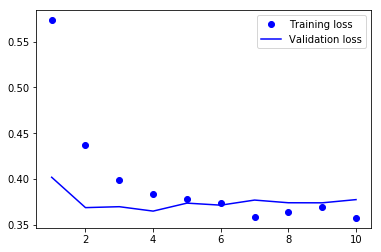

In [271]:
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.legend()

In [272]:
plt.clf()
acc = history_dict['acc']
val_acc = history_dict['val_acc']

<Figure size 432x288 with 0 Axes>

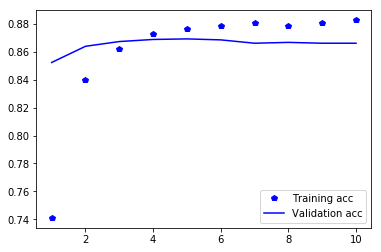

In [273]:
plt.plot(epochs, acc, 'bp', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.legend()
plt.show()

In [281]:
model.evaluate(x_test,y_test)

9932/9932 [==============================] - 0s 43us/step


[0.3715295476919213, 0.8686065243656866]